In [2]:
import sys
import os

project_root = os.getcwd()
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [3]:
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from weather_forecast.ETL.data_loader import DataLoader, DataLoaderConfig

sns.set()

In [4]:
def plot_city(df,country_code, city_name, date_from = None, date_to = None):
    plot_data = df.copy()
    if date_from:
        plot_data = plot_data[plot_data["DATE"] >= date_from]
    if date_to:
        plot_data = plot_data[plot_data["DATE"] <= date_to]
    
    plt.figure(figsize = (20, 10))
    sns.lineplot(
        data = plot_data,
        x = "DATE",
        y = "TAVG",
        label = "Avg",
        color = "black",
        linestyle = "--",
    )

    plt.fill_between(
        x = plot_data["DATE"],
        y1 = plot_data["TMIN"],
        y2 = plot_data["TMAX"],
        color="grey",
        alpha=0.2,
        label="C Interval"
    )

    sns.lineplot(
        data = plot_data,
        x = "DATE",
        y = "TMIN",
        label = "Min",
        color = "blue",
        alpha = 0.5,
    )

    sns.lineplot(
        data = plot_data,
        x = "DATE",
        y = "TMAX",
        label = "Max",
        color = "red",
        alpha = 0.5,
    )

    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"{int(x)} C"))
    plt.ylabel("Celsius Degree", fontsize = 16)
    plt.xlabel("Date", fontsize = 16)
    plt.title(f"{country_code}, {city_name} Temperature\n{plot_data.DATE.min().date()} - {plot_data.DATE.max().date()}", fontsize = 16)
    plt.tight_layout()
    plt.show()

In [5]:
data_loader_config = DataLoaderConfig(
    country_code = "HU",
    city_name = "Bagamér",
    date_from = dt.datetime(2020, 1, 1),
    date_to = dt.datetime(2025, 6, 30)
)

In [6]:
df = DataLoader.get_weather_data(data_loader_config)

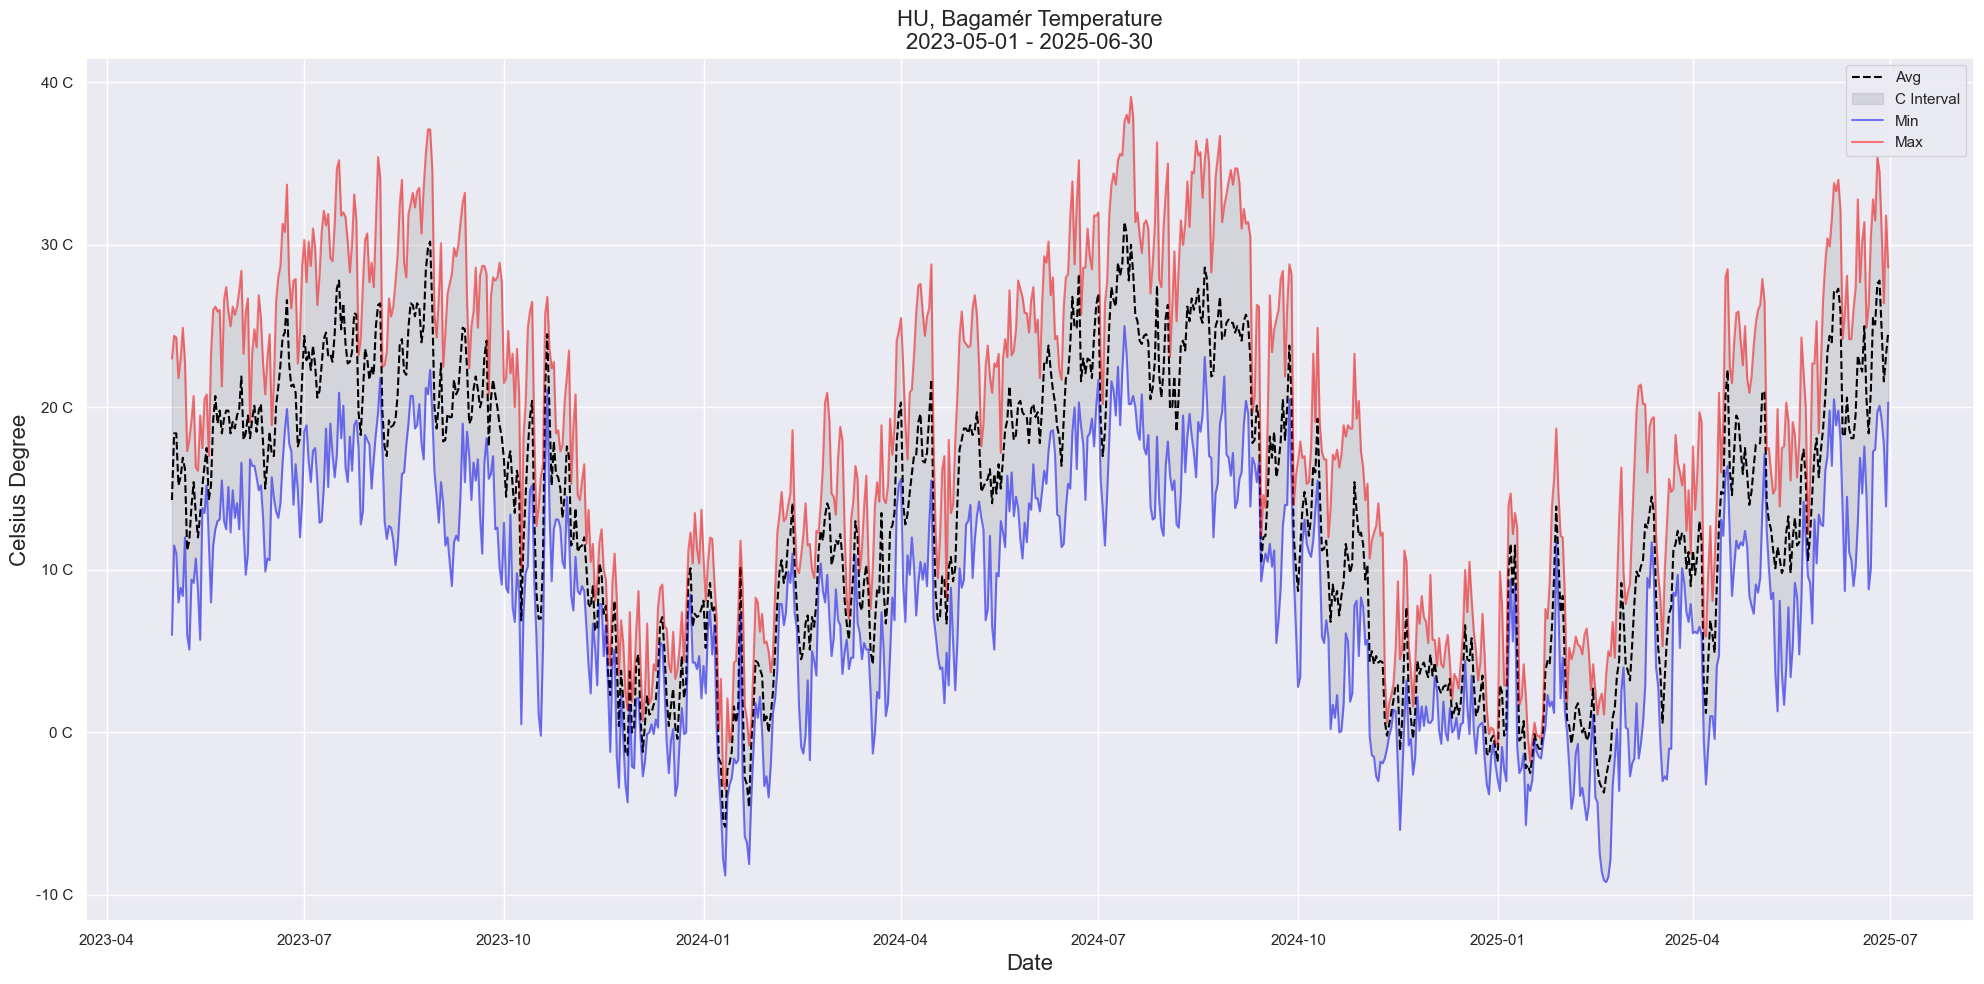

In [7]:
plot_city(df = df,
          country_code = data_loader_config.country_code,
          city_name = data_loader_config.city_name,
          date_from = dt.datetime(2023, 5, 1),
          date_to = dt.datetime(2025, 7, 1)
        )